In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from src.wrangle import read_and_filter_data
from datetime import datetime, timedelta

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200)

In [2]:
df = pd.read_csv('uft_negotiated_payroll.csv', engine='pyarrow')

In [3]:
df.head()

,Fiscal Year,Employee ID,Hire Date,Hire Year,Years of Employment,Paystep,Differential,Salary,Salary Delta,Salary Monetary Diff
0,2021,0,2011-09-01,2011,10,8B+L5,MA+30C6,91941.0,0.0,0.0
1,2022,0,2011-09-01,2011,11,8B+L5,MA+30C6,91941.0,0.0,0.0
2,2021,1,1996-09-03,1996,25,8B+L22,MA+30C6+PD,128657.0,0.0,0.0
3,2022,1,1996-09-03,1996,26,8B+L22,MA+30C6+PD,128657.0,0.0,0.0
4,2023,1,1996-09-03,1996,27,8B+L22,MA+30C6+PD,128657.0,0.0,0.0


2021 0


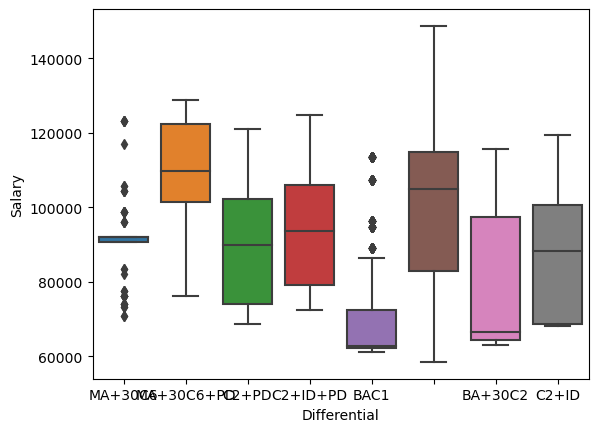

2022 0


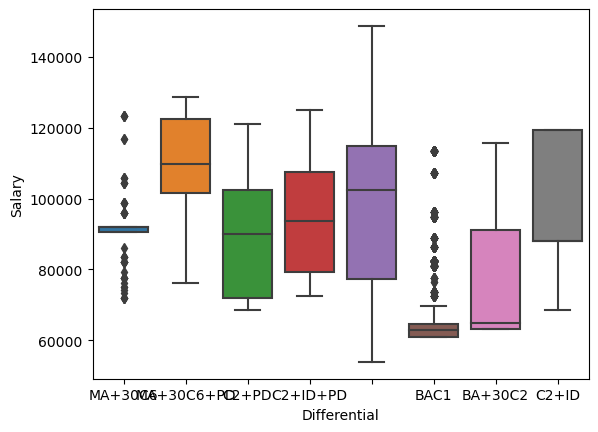

2023 0


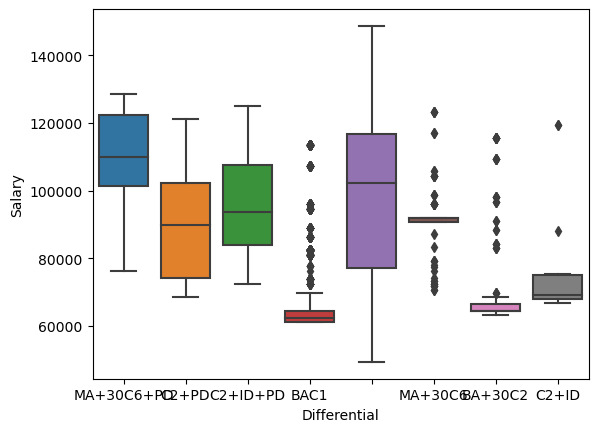

In [4]:
for y in [2021, 2022, 2023]:
    print(y, df[df['Fiscal Year']==y]['Paystep'].isin([None]).sum())
    sns.boxplot(data=df[df['Fiscal Year']==y], x='Differential', y='Salary')
    plt.show();

In [5]:
df[df['Paystep']=='']

,Fiscal Year,Employee ID,Hire Date,Hire Year,Years of Employment,Paystep,Differential,Salary,Salary Delta,Salary Monetary Diff
70,2022,29,2013-10-24,2013,9,,,53934.0,-33.71,-27424.0
103,2021,43,2005-09-06,2005,16,,,76896.0,0.00,0.0
150,2021,61,2003-02-03,2003,18,,,113558.0,0.00,0.0
151,2022,61,2003-02-03,2003,19,,,115056.0,1.32,1498.0
152,2023,61,2003-02-03,2003,20,,,115056.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
152247,2022,60020,2002-10-23,2002,20,,,123850.0,11.23,12500.0
152248,2023,60020,2002-10-23,2002,21,,,134924.0,8.94,11074.0
152262,2021,60026,2010-09-07,2010,11,,,101362.0,0.00,0.0
152263,2022,60026,2010-09-07,2010,12,,,106362.0,4.93,5000.0


In [7]:
df['Differential'].value_counts().sort_index()

Differential
               4588
BA+30C2         332
BAC1           9111
C2+ID            28
C2+ID+PD       9182
C2+PD         47152
MA+30C6         314
MA+30C6+PD    81583
Name: count, dtype: int64

In [8]:
differential_mapping = {'BA+30C2':'Bachelor Degree + 30 Credit Hours',
                        'BAC1':'Bachelor Degree',
                        'C2+ID':'Bachelor Degree + 60 Credit Hours',
                        'C2+ID+PD':'Bachelor Degree + 60 Credit Hours + 36 Credit Hours of Approved Subjects',
                        'C2+PD':'Bachelor Degree + 36 Credit Hours of Approved Subjects',
                        'MA+30C6':'Masters Degree',
                        'MA+30C6+PD':'Masters Plus'}

In [12]:
df['Differential'].map(differential_mapping).value_counts().sort_index().index

Index(['Bachelor Degree', 'Bachelor Degree + 30 Credit Hours',
       'Bachelor Degree + 36 Credit Hours of Approved Subjects',
       'Bachelor Degree + 60 Credit Hours',
       'Bachelor Degree + 60 Credit Hours + 36 Credit Hours of Approved Subjects',
       'Masters Degree', 'Masters Plus'],
      dtype='object', name='Differential')

In [13]:
['Bachelor Degree',
'Bachelor Degree + 30 Credit Hours',
'Bachelor Degree + 60 Credit Hours',
'Bachelor Degree + 36 Credit Hours of Approved Subjects',
'Bachelor Degree + 60 Credit Hours + 36 Credit Hours of Approved Subjects',
'Masters Degree',
'Masters Plus']

['Bachelor Degree',
 'Bachelor Degree + 30 Credit Hours',
 'Bachelor Degree + 60 Credit Hours',
 'Bachelor Degree + 36 Credit Hours of Approved Subjects',
 'Bachelor Degree + 60 Credit Hours + 36 Credit Hours of Approved Subjects',
 'Masters Degree',
 'Masters Plus']